<center>

$\Huge \textbf{Universidad Tecmilenio}$  
<p align="center">
  <img src="https://raw.githubusercontent.com/caveadventurer/ML_Finanzas_PF_Rivera_Goitia/main/tecmilenio_logo.png" alt="Tecmilenio" width="200"/>
</p>

<hr style="height:3px; background-color:#0B6E4F; border:none;"/>


$\LARGE \textbf{Proyecto Final}$  

$\Large \textit{Introducción a la Ciencia de Datos y Machine Learning}$  

$\large \textsf{con Datos Financieros}$  

\begin{array}{rl}
\textbf{Docente:} & Eric Geraldo Torres Flores \\[6pt]
\textbf{Alumno:} & Luis Ricardo Rivera Goitia \\[6pt]
\textbf{Fecha de entrega:} & 07/12/2025
\end{array}

</center>

***
**Tecmilenio no guarda relación alguna con las marcas mencionadas como ejemplo. Las marcas son propiedad de sus titulares conforme a la legislación aplicable, se utilizan con fines académicos y didácticos, por lo que no existen fines de lucro, relación publicitaria o de patrocinio.

---

**Instrucciones iniciales**:

- Dale un nombre descriptivo al archivo con la siguiente nomenclatura ML_Finanzas_PF_ApellidoPAterno_ApellidoMaterno_PrimerNombre.ipynb, por ejemplo, ML_Finanzas_PF_Lopez_Rosas_Laura.ipynb

- Escribe tu nombre y el de tu docente en el título dando doble clic a la celda y colocando los datos correctos.

- Documenta tu trabajo, añade comentarios a tu código usando # para explicar lo que haces. Utiliza celdas de texto (Markdown) para responder a las preguntas y documentar tus hallazgos.

- Ejecuta celdas: Puedes ejecutar cada bloque de código (celda) haciendo clic en el botón de "Play" o presionando Shift + Enter.

#Proyecto Final: Análisis Integral del Riesgo Crediticio y Predicción del Monto de Préstamo

## Desarrollo del proyecto: pasos detallados

### Paso 1: Configuración del entorno e importación de librerías






Primero, importaremos las librerías necesarias.



In [2]:
# Este bloque importa todas las librerías necesarias para el análisis y modelado de datos.
# Incluye herramientas para manipulación de datos (pandas, numpy), visualización (matplotlib, seaborn),
# preprocesamiento y división de datos (scikit-learn), y modelos clásicos de regresión y clasificación.
# También integra funciones de evaluación (accuracy, precision, recall, F1-score, matrices de confusión),
# así como librerías avanzadas para interpretación de modelos como SHAP y algoritmos como XGBoost.
# Finalmente, incorpora utilidades como tqdm y joblib, que permiten mostrar barras de progreso y ejecutar
# procesos de manera más eficiente. En conjunto, estas importaciones preparan todo el entorno necesario para
# construir, entrenar, evaluar e interpretar modelos de machine learning dentro del notebook.


# Para manipulación y análisis de datos
import pandas as pd
# Para operaciones numéricas (opcional, pero útil)
import numpy as np
# Para visualización de datos
import matplotlib.pyplot as plt
# Para visualización de datos mejorada
import seaborn as sns

# Para dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
# Para validación cruzada y optimización de hiperparámetros [2, 43]
from sklearn.model_selection import RepeatedKFold, RandomizedSearchCV

# Modelos de Regresión
from sklearn.linear_model import LinearRegression

# Modelos de Clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Para preprocesamiento de datos
from sklearn.preprocessing import MinMaxScaler
# Alternativa a MinMaxScaler
# from sklearn.preprocessing import StandardScaler

# Para evaluación de modelos
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Para interpretación de modelos (SHAP)
import shap
import xgboost   # Para un ejemplo de modelo no lineal en SHAP

#Para la barra de avance
from tqdm import tqdm
from joblib import parallel_backend
import joblib

print("Librerías importadas correctamente.")

Librerías importadas correctamente.


## Parte A: Preparación y exploración de datos


### Paso 2: Adquisición de datos financieros (LendingClub)
Utilizaremos un conjunto de datos de préstamos de LendingClub disponibles en GitHub Gist. Este dataset es ideal para problemas de riesgo crediticio.

In [3]:
# Este bloque carga tres subconjuntos de datos del proyecto LendingClub directamente desde GitHub Gist,
# cada uno correspondiente a préstamos con distintos niveles de financiamiento (bajo, medio y alto).
# Al leer los tres archivos CSV desde sus URLs y combinarlos en un solo DataFrame con `pd.concat`,
# se obtiene un conjunto de datos más grande, variado y representativo, lo cual mejora la calidad del
# análisis posterior y permite entrenar modelos con mayor robustez.
#
# Después de combinar los datos, el código muestra las primeras filas del DataFrame para inspeccionar
# visualmente su estructura y verificar que la carga se realizó correctamente, incluyendo columnas como
# monto financiado, tasa de interés, historial crediticio y estatus del préstamo.
#
# Finalmente, se imprime el tamaño total del DataFrame (número de filas y columnas). Esto es importante
# para comprender la magnitud del dataset, validar que todos los archivos se integraron sin problemas y
# asegurarse de que se cuenta con suficientes observaciones para entrenar, evaluar y validar modelos de
# machine learning de manera adecuada.


# Cargar los conjuntos de datos desde GitHub Gist y combinarlos
# Usaremos el conjunto completo mencionado en ML_Tema06 para una muestra más grande y representativa [83, 84]
dataset_urls = [ # [83]
    "https://gist.githubusercontent.com/RHDZMOTA/71c7bfc23dbd13eb8a1dfb26f7399510/raw/c0274bcb736ba2f94c29aa3d1baf2136a75f02e5/dataset-lendingclub-custom-low-funding.csv",
    "https://gist.githubusercontent.com/RHDZMOTA/71c7bfc23dbd13eb8a1dfb26f7399510/raw/c0274bcb736ba2f94c29aa3d1baf2136a75f02e5/dataset-lendingclub-custom-medium-funding.csv",
    "https://gist.githubusercontent.com/RHDZMOTA/71c7bfc23dbd13eb8a1dfb26f7399510/raw/c0274bcb736ba2f94c29aa3d1baf2136a75f02e5/dataset-lendingclub-custom-large-funding.csv"
]
df = pd.concat([pd.read_csv(url) for url in dataset_urls])

# Muestra las primeras filas del DataFrame [85]
print("Primeras 5 filas del dataset de LendingClub:")
print(df.head())

# Muestra el tamaño del DataFrame
print(f"\nEl dataset tiene {df.shape} filas y {df.shape[1]} columnas.")

Primeras 5 filas del dataset de LendingClub:
   funded_amount        term  interest_rate  installment grade sub_grade  \
0           5000   36 months          10.65       162.87     B        B2   
1           2500   60 months          15.27        59.83     C        C4   
2           2400   36 months          15.96        84.33     C        C5   
3           5000   36 months           7.90       156.46     A        A4   
4           3000   36 months          18.64       109.43     E        E1   

  employment_length home_ownership  annual_income verification_status  \
0         10+ years           RENT        24000.0            Verified   
1          < 1 year           RENT        30000.0     Source Verified   
2         10+ years           RENT        12252.0        Not Verified   
3           3 years           RENT        36000.0     Source Verified   
4           9 years           RENT        48000.0     Source Verified   

   loan_status payment_plan         purpose zip_code addres

In [4]:
df.head(5)

,funded_amount,term,interest_rate,installment,grade,sub_grade,employment_length,home_ownership,annual_income,verification_status,loan_status,payment_plan,purpose,zip_code,address_state,earliest_credit_line,issue_date
0,5000,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,n,credit_card,860xx,AZ,Jan-85,Dec-11
1,2500,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,car,309xx,GA,Apr-99,Dec-11
2,2400,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,small_business,606xx,IL,Nov-01,Dec-11
3,5000,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Fully Paid,n,wedding,852xx,AZ,Nov-04,Dec-11
4,3000,36 months,18.64,109.43,E,E1,9 years,RENT,48000.0,Source Verified,Fully Paid,n,car,900xx,CA,Jan-07,Dec-11


**Pregunta de Reflexión 1**:
¿Qué representan las columnas  y  en este conjunto de datos financieros de LendingClub? ¿Cómo se relacionan con la predicción del nivel de riesgo crediticio y qué tipo de problemas de ML (regresión o clasificación) abordaríamos con cada una?


**Respuesta**:
- Las columnas del dataset de LendingClub representan las características financieras, crediticias y demográficas de los solicitantes de préstamo. Incluyen información del monto financiado (funded_amount), plazo del crédito (term), tasa de interés (interest_rate), pago mensual (installment), calificaciones crediticias asignadas por la plataforma (grade y sub_grade), estabilidad laboral (employment_length), tipo de vivienda (home_ownership), ingresos anuales (annual_income), verificación de ingresos (verification_status), estado final del préstamo (loan_status), propósito declarado del crédito (purpose) y variables geográficas como código postal y estado (zip_code, address_state). También se incluyen fechas clave como la apertura de la primera línea de crédito (earliest_credit_line) y la fecha de emisión del préstamo (issue_date). Estas variables describen el perfil completo del prestatario y el comportamiento del crédito.
- Estas columnas permiten evaluar el riesgo crediticio porque capturan factores que están directamente asociados con la probabilidad de que un solicitante cumpla o incumpla sus pagos; por ejemplo, ingresos, historial laboral, calificación crediticia y el estado final del préstamo (loan_status) son indicadores fuertes de solvencia. Con esta información, se pueden abordar problemas de clasificación, como predecir si un préstamo será Fully Paid (bajo riesgo) o Charged Off (alto riesgo), y también problemas de regresión, como estimar la probabilidad numérica de incumplimiento, la pérdida esperada o la tasa de interés adecuada según el riesgo. En resumen, las mismas variables permiten diseñar modelos tanto de clasificación crediticia como de regresión orientada a estimar métricas financieras continuas del riesgo.


### Paso 3: Exploración inicial de datos (EDA básico)
Es fundamental entender la estructura y características de nuestros datos.

In [5]:
# Este bloque realiza una exploración inicial del dataset para entender su estructura,
# calidad y distribución de los datos antes de aplicar cualquier modelo de machine learning.
# Primero, df.info() muestra información general del DataFrame, incluyendo número de filas,
# tipo de dato de cada columna y cuántos valores no nulos contiene, lo que permite detectar
# columnas categóricas, numéricas y posibles problemas de calidad. Después, df.describe()
# genera estadísticas descriptivas de las variables numéricas (promedio, desviación estándar,
# valores mínimos y máximos, percentiles), lo cual ayuda a identificar rangos típicos,
# valores atípicos y la escala de los datos. Finalmente, se calculan los valores nulos por
# columna, lo que permite detectar qué variables requieren limpieza o imputación antes de
# construir un modelo.


# Obtener información general del DataFrame (tipos de datos, valores no nulos)
print("\nInformación general del dataset:")
df.info()

# Estadísticas descriptivas de las columnas numéricas
print("\nEstadísticas descriptivas del dataset:")
print(df.describe())

# Verificar la presencia de valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum()[df.isnull().sum() > 0]) # Solo muestra columnas con valores nulos


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 222175 entries, 0 to 71525
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   funded_amount         222175 non-null  int64  
 1   term                  222175 non-null  object 
 2   interest_rate         222175 non-null  float64
 3   installment           222175 non-null  float64
 4   grade                 222175 non-null  object 
 5   sub_grade             222175 non-null  object 
 6   employment_length     213019 non-null  object 
 7   home_ownership        222175 non-null  object 
 8   annual_income         222171 non-null  float64
 9   verification_status   222175 non-null  object 
 10  loan_status           222175 non-null  object 
 11  payment_plan          222175 non-null  object 
 12  purpose               222175 non-null  object 
 13  zip_code              222175 non-null  object 
 14  address_state         22

**Pregunta de Reflexión 2**:
¿Qué observaciones clave puedes hacer sobre la calidad de los datos (valores faltantes, tipos de datos, rangos) que influirán en los próximos pasos de limpieza y preparación?


**Respuesta**:
- La inspección inicial del dataset muestra que la mayoría de las columnas están completas, pero existen valores faltantes en variables clave como employment_length, annual_income y earliest_credit_line, lo que requerirá imputación o eliminación de registros según su importancia para el modelo. También se observa que muchas columnas relevantes se encuentran en formato object aun cuando representan categorías o fechas, por lo que será necesario convertirlas a tipos adecuados (categorías o datetime) para permitir un análisis correcto. Las variables numéricas presentan rangos amplios, por ejemplo, ingresos con valores extremos de hasta 7 millones; lo que sugiere la presencia de outliers que podrían afectar modelos sensibles y requerir escalamiento o tratamiento adicional. Estos aspectos son fundamentales para decidir las transformaciones, codificaciones y estrategias de limpieza antes de entrenar cualquier modelo de machine learning.



### Paso 4: Limpieza y preparación de datos avanzada


La limpieza de datos es un paso crucial en cualquier proyecto de ML, constituyendo aproximadamente el 80% de la labor de un analista de datos. En este paso, nos enfocaremos en:
1. Crear la variable objetivo de clasificación loan_success a partir de loan_status.
2. Manejar valores nulos.
3. Limpiar y ajustar tipos de datos para columnas específicas como term y emp_length.
4. Convertir las variables categóricas a un formato numérico utilizando "one-hot encoding".
5. Normalizar o estandarizar las variables numéricas, lo cual es esencial para modelos como las Redes Neuronales.

In [6]:
# Este bloque prepara el dataset para el modelado. Primero crea la variable objetivo 'loan_success'
# asignando 1 a préstamos exitosos y 0 al resto, y elimina la columna original. Luego descarta
# columnas irrelevantes o con muchos nulos. Limpia variables como 'term' y 'employment_length' para que
# sean numéricas, elimina filas con nulos restantes y convierte todas las variables categóricas en
# variables dummy mediante one-hot encoding. Finalmente normaliza las variables numéricas usando
# MinMaxScaler para dejar el dataset listo para entrenamiento de modelos.


# 1. Crear la variable objetivo de clasificación 'loan_success'
# Consideramos 'Fully Paid' como éxito (1) y cualquier otro estado como no éxito (0)
# Se incluyen también "Does not meet the credit policy. Status:Fully Paid" como éxito, según ML_Tema06 .
successful_statuses = ["Fully Paid", "Does not meet the credit policy. Status:Fully Paid"]
df['loan_success'] = df['loan_status'].isin(successful_statuses).astype(int)
# Eliminar la columna original 'loan_status' ya que hemos creado 'loan_success'
df_processed = df.drop(columns=['loan_status'])

# Eliminar columnas con muchos valores nulos o irrelevantes para el modelado directo [Previous Response]
# Las columnas 'id', 'member_id', 'emp_title', 'url', 'Unnamed: 0' suelen ser identificadores o texto libre
# con alta cardinalidad que requieren procesamiento avanzado o no son directamente predictivas para este ejercicio.
df_processed = df_processed.drop(columns=['id', 'member_id', 'emp_title', 'url', 'Unnamed: 0'], errors='ignore')

# Limpiar y ajustar tipos de datos para algunas columnas antes de manejar nulos o codificar
# 'term' necesita limpieza para ser numérica (ej. ' 36 months' -> 36)
df_processed['term'] = df_processed['term'].astype(str).str.replace(' months', '', regex=False).astype(int)
# 'emp_length' necesita limpieza (ej. '< 1 year', '10+ years') a valores numéricos
df_processed['employment_length'] = df_processed['employment_length'].astype(str).str.replace(' years?', '', regex=True)
#.str.replace('< 1', '0').str.replace('10\\+', '10').astype(float)

# Eliminar filas con valores nulos restantes después de la limpieza de texto
# Esta es una estrategia simple; en un proyecto real se considerarían imputaciones más sofisticadas.
df_processed = df_processed.dropna() #

# 2. Convertir variables categóricas a numéricas usando one-hot encoding
# Identificar columnas categóricas restantes
categorical_cols = df_processed.select_dtypes(include='object').columns.tolist() #
print(f"\nColumnas categóricas a codificar con one-hot encoding: {categorical_cols}")

df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True) # drop_first=True evita multicolinealidad

# 3. Normalizar/Estandarizar las variables numéricas (MinMaxScaler)
# Identificar columnas numéricas (excluyendo 'loan_success' y 'loan_amnt' si se escalan por separado o si es la variable objetivo)
numeric_cols_to_scale = df_processed.select_dtypes(include=np.number).columns.tolist()
if 'loan_success' in numeric_cols_to_scale: numeric_cols_to_scale.remove('loan_success')
if 'loan_amnt' in numeric_cols_to_scale: numeric_cols_to_scale.remove('loan_amnt') # La variable objetivo de regresión no se escala ahora

scaler = MinMaxScaler(feature_range=(0, 1))
df_processed[numeric_cols_to_scale] = scaler.fit_transform(df_processed[numeric_cols_to_scale])

print("\nPrimeras 5 filas del dataset después de la limpieza, codificación y escalado:")
print(df_processed.head())
print("\nInformación general del dataset después de la limpieza, codificación y escalado:")
df_processed.info()



Columnas categóricas a codificar con one-hot encoding: ['grade', 'sub_grade', 'employment_length', 'home_ownership', 'verification_status', 'payment_plan', 'purpose', 'zip_code', 'address_state', 'earliest_credit_line', 'issue_date']

Primeras 5 filas del dataset después de la limpieza, codificación y escalado:
   funded_amount  term  interest_rate  installment  annual_income  \
0       0.130435   0.0       0.253391     0.105712       0.003096   
1       0.057971   1.0       0.477229     0.031714       0.003936   
2       0.055072   0.0       0.510659     0.049308       0.001450   
3       0.130435   0.0       0.120155     0.101109       0.004777   
4       0.072464   0.0       0.640504     0.067334       0.006457   

   loan_success  grade_B  grade_C  grade_D  grade_E  ...  issue_date_Oct-13  \
0             1     True    False    False    False  ...              False   
1             0    False     True    False    False  ...              False   
2             1    False     True 

**Pregunta de Reflexión 3**:
¿Por qué la elección de estrategias para manejar valores nulos (eliminar filas vs. imputar) y el tipo de escalado (MinMaxScaler vs. StandardScaler) son decisiones importantes en la fase de preparación de datos, y cómo pueden afectar a los diferentes modelos que se utilizarán?

**Respuesta**:
- La elección de cómo tratar valores nulos y qué tipo de escalado aplicar es crucial porque influye directamente en la calidad del aprendizaje de los modelos. Eliminar filas reduce el tamaño del dataset y puede sesgar los datos, mientras que imputar introduce valores estimados que afectan la distribución real. Por otro lado, usar MinMaxScaler o StandardScaler impacta a modelos sensibles a la escala, como redes neuronales, regresión logística o Support Vector Machine (SVM), que requieren variables comparables para converger correctamente; mientras que modelos basados en árboles (Decision Tree, Random Forest, XGBoost) no dependen del escalado y pueden verse poco afectados. Estas decisiones determinan qué patrones aprende el modelo y qué tan bien generaliza.


### Paso 5: Análisis exploratorio de datos (EDA Visual)



Una vez preparados, podemos visualizar nuestros datos para entender mejor sus características.

In [7]:
df.columns

Index(['funded_amount', 'term', 'interest_rate', 'installment', 'grade',
       'sub_grade', 'employment_length', 'home_ownership', 'annual_income',
       'verification_status', 'loan_status', 'payment_plan', 'purpose',
       'zip_code', 'address_state', 'earliest_credit_line', 'issue_date',
       'loan_success'],
      dtype='object')

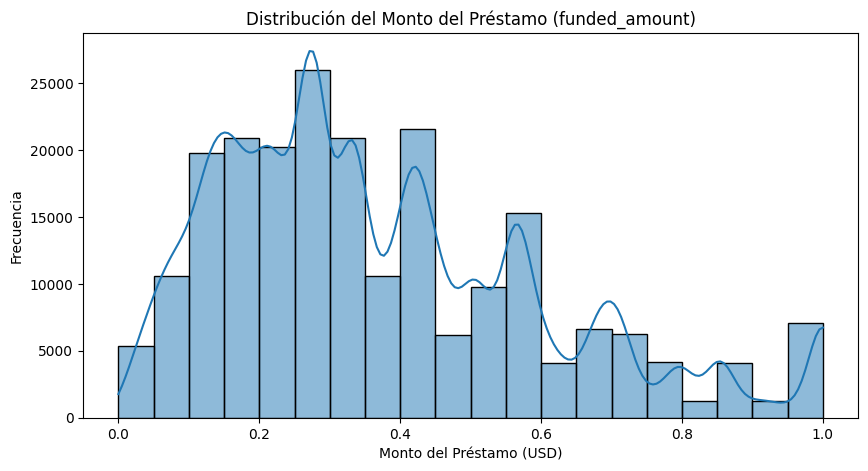

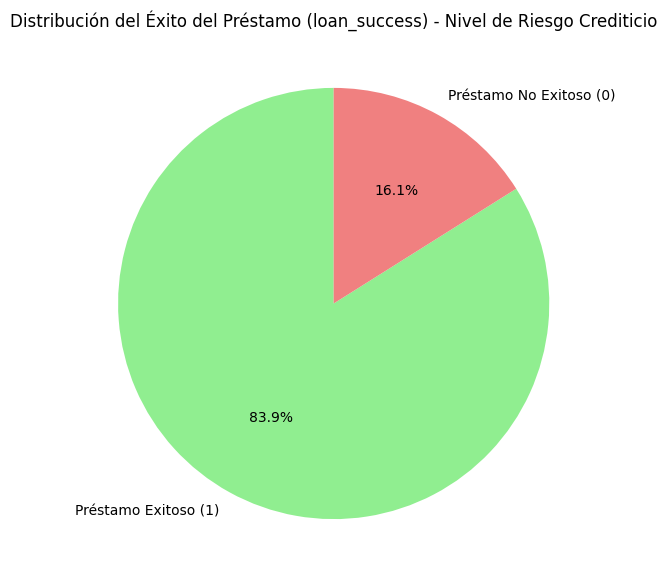

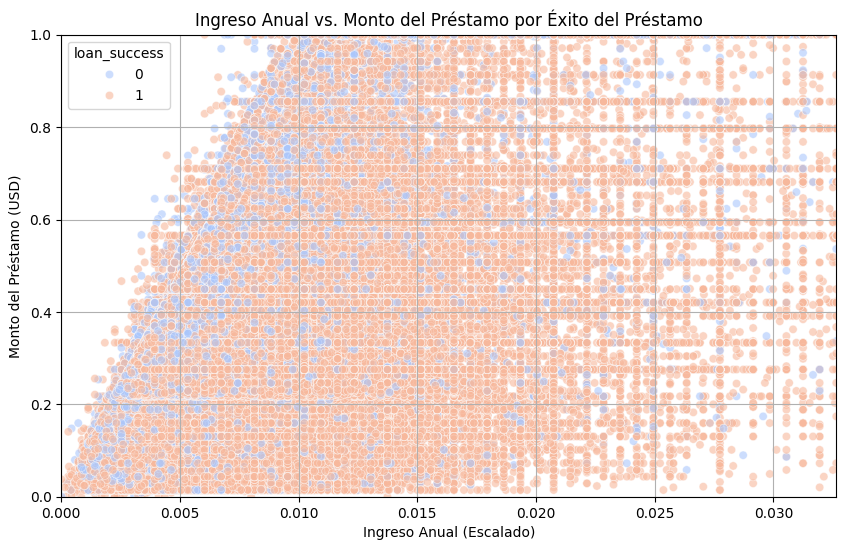

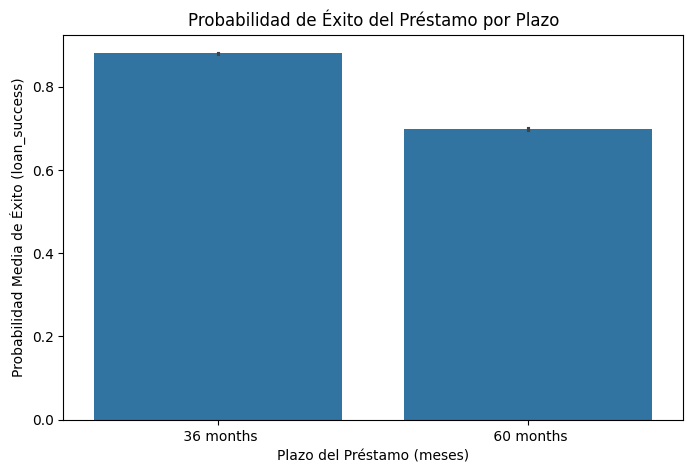

In [8]:
# Este bloque genera visualizaciones clave del análisis exploratorio.
# El histograma muestra cómo se distribuye el monto del préstamo (funded_amount),
#    permitiendo identificar rangos comunes, sesgos y posibles valores extremos.
# La gráfica de pastel muestra el porcentaje de préstamos exitosos vs. no exitosos,
#    lo cual ayuda a entender el balance de clases en el problema de clasificación.
# El scatterplot compara ingreso anual vs. monto del préstamo, coloreando por loan_success,
#    para observar posibles patrones entre ingresos, montos solicitados y probabilidad de éxito.
#    Se aplican límites a los ejes para reducir el efecto de outliers y mejorar la visualización.
# El barplot muestra cómo varía la probabilidad promedio de éxito según el plazo del préstamo (36 o 60 meses),
#    permitiendo evaluar si el término del préstamo influye en el riesgo crediticio.


# Visualizar la distribución del monto del préstamo (variable de regresión)
plt.figure(figsize=(10, 5))
sns.histplot(df_processed['funded_amount'], bins=20, kde=True)
plt.title('Distribución del Monto del Préstamo (funded_amount)')
plt.xlabel('Monto del Préstamo (USD)')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar la distribución del éxito del préstamo (variable de clasificación)
plt.figure(figsize=(7, 7))
df_processed['loan_success'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'], labels=['Préstamo Exitoso (1)', 'Préstamo No Exitoso (0)'])
plt.title('Distribución del Éxito del Préstamo (loan_success) - Nivel de Riesgo Crediticio')
plt.ylabel('')
plt.show()

# Crear un gráfico de dispersión de ingreso anual vs. monto del préstamo por éxito del préstamo
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_income', y='funded_amount', hue='loan_success', data=df_processed, palette='coolwarm', alpha=0.6)
plt.title('Ingreso Anual vs. Monto del Préstamo por Éxito del Préstamo')
plt.xlabel('Ingreso Anual (Escalado)')
plt.ylabel('Monto del Préstamo (USD)')
plt.grid(True)
# Limitar los ejes para mejor visualización si hay outliers significativos
plt.ylim(0, df_processed['funded_amount'].quantile(0.99))
plt.xlim(0, df_processed['annual_income'].quantile(0.99))
plt.show()

# Gráfico de barras para una variable categórica codificada (ej. term_60_months)
# Esto muestra el impacto de una categoría específica en el riesgo crediticio
plt.figure(figsize=(8, 5))
sns.barplot(x='term', y='loan_success', data=df.loc[df_processed.index]) # Usamos el df original filtrado para 'term' antes de one-hot encoding para mejor interpretabilidad
plt.title('Probabilidad de Éxito del Préstamo por Plazo')
plt.xlabel('Plazo del Préstamo (meses)')
plt.ylabel('Probabilidad Media de Éxito (loan_success)')
plt.show()

# Pregunta de Reflexión 4:
Analiza los gráficos generados. ¿Qué patrones o tendencias relevantes puedes identificar en la distribución de  ingreso anual y monto de préstamo? ¿Hay alguna relación visual entre ingreso anual y monto de préstamo que sugiera factores de riesgo o éxito? ¿Qué te revela el gráfico de  sobre la probabilidad de éxito del préstamo?


**Respuesta**:
- Los gráficos muestran que el monto del préstamo tiene una distribución concentrada en valores bajos y medios, lo cual sugiere que la mayoría de solicitantes piden montos moderados, mientras que los ingresos anuales también se concentran en rangos relativamente bajos; al combinar ambas variables en el scatterplot, se observa una relación positiva débil: a mayor ingreso, tiende a aumentar el monto solicitado, aunque con mucha dispersión, lo que indica que el ingreso no es un factor determinante por sí solo para definir el nivel de riesgo o el éxito del préstamo. En cuanto al desempeño crediticio, el gráfico de barras muestra que los préstamos a 36 meses tienen una probabilidad de éxito claramente mayor que los de 60 meses, lo que sugiere que plazos largos incrementan el riesgo de incumplimiento; finalmente, el gráfico circular confirma que la gran mayoría de préstamos del dataset son exitosos (83.9%), lo cual indica un fuerte desbalance de clases que podría afectar el rendimiento de los modelos de clasificación y requiere técnicas adecuadas para compensarlo.


## Parte B: Modelado y evaluación de Regresión (predicción del monto del préstamo)


Para nuestras tareas de regresión, elegiremos la variable  como la variable dependiente (y) que queremos predecir.


### Paso 6: Preparación para los modelos de regresión


Definiremos las variables independientes (X) y la variable dependiente (y) y dividiremos el dataset en conjuntos de entrenamiento y prueba.

In [9]:
# Este bloque prepara los datos para un modelo de regresión cuyo objetivo es predecir el monto del préstamo ('funded_amount').
# Primero, se definen las variables independientes X_reg eliminando las columnas 'funded_amount' (la variable que se quiere predecir)
# y 'loan_success' (variable objetivo de clasificación que no aplica en el modelo de regresión).
# La variable dependiente y_reg será únicamente 'funded_amount'.
# Luego se dividen los datos en entrenamiento (80%) y prueba (20%) para evaluar el modelo.
# 'random_state=42' asegura reproducibilidad de los resultados.
# Finalmente se imprimen las dimensiones de los conjuntos generados
# para confirmar que la división se realizó correctamente y conocer cuántas
# muestras hay en entrenamiento y prueba.


# Definir las variables independientes (X_reg) y la variable dependiente (y_reg)
# Para la regresión, excluiremos 'loan_amnt' (nuestra variable objetivo),
# y 'loan_success' (nuestra variable objetivo para clasificación) de las características para X.
X_reg = df_processed.drop(columns=['funded_amount', 'loan_success']) # Variables de entrada
y_reg = df_processed['funded_amount'] # Variable objetivo a predecir

# Dividir los datos en conjuntos de entrenamiento y prueba para regresión
# Usaremos el 80% para entrenamiento y el 20% para prueba
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

print(f"\nTamaño del conjunto de entrenamiento X para regresión: {X_reg_train.shape}")
print(f"Tamaño del conjunto de prueba X para regresión: {X_reg_test.shape}")
print(f"Tamaño del conjunto de entrenamiento y para regresión: {y_reg_train.shape}")
print(f"Tamaño del conjunto de prueba y para regresión: {y_reg_test.shape}")


Tamaño del conjunto de entrenamiento X para regresión: (177716, 1718)
Tamaño del conjunto de prueba X para regresión: (44430, 1718)
Tamaño del conjunto de entrenamiento y para regresión: (177716,)
Tamaño del conjunto de prueba y para regresión: (44430,)


### Paso 7: Construcción y evaluación de un modelo de regresión lineal simple
Utilizaremos la regresión lineal simple, un modelo básico que permite entender la relación lineal entre una única variable independiente y la variable dependiente. Prediremos el  usando solo .


--- Modelado con Regresión Lineal Simple ---
Coeficientes del modelo de Regresión Lineal Simple:
annual_income: 9.6686
Intercepto: 0.2787

Error Cuadrático Medio (MSE) en el conjunto de prueba (Simple): 0.0469
R-cuadrado (R²) en el conjunto de prueba (Simple): 0.1448


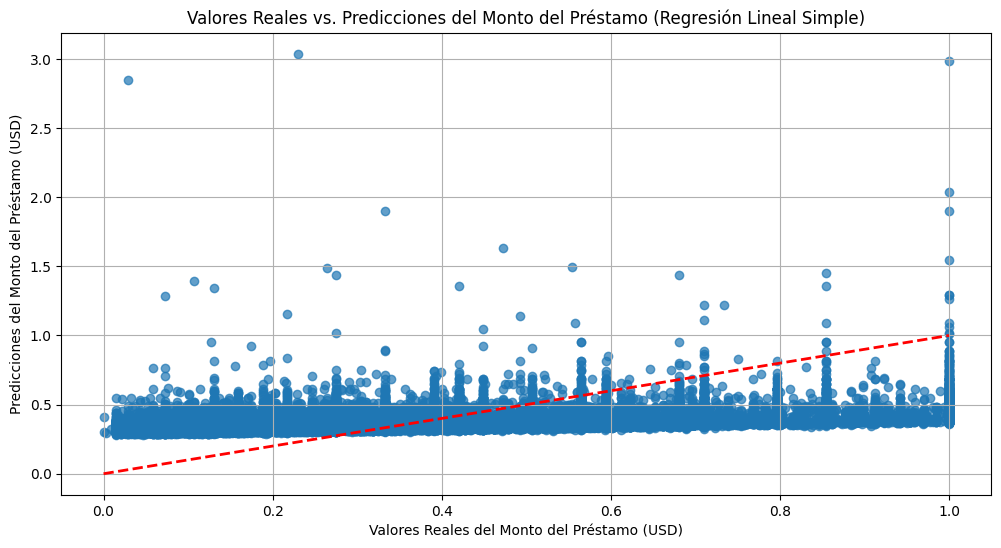

In [10]:
# Este bloque entrena un modelo de regresión lineal simple usando solo el ingreso anual
# para predecir el monto del préstamo. Primero selecciona la variable, entrena el modelo,
# muestra sus coeficientes, evalúa el desempeño con MSE y R², y finalmente grafica
# cómo se comparan las predicciones frente a los valores reales.


print("\n--- Modelado con Regresión Lineal Simple ---")

# Seleccionar solo 'annual_inc' como variable independiente para regresión simple
X_reg_simple_train = X_reg_train[['annual_income']]
X_reg_simple_test = X_reg_test[['annual_income']]

# Crear una instancia del modelo de Regresión Lineal
model_reg_simple = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model_reg_simple.fit(X_reg_simple_train, y_reg_train)

# Mostrar los coeficientes del modelo
print("Coeficientes del modelo de Regresión Lineal Simple:")
print(f"annual_income: {model_reg_simple.coef_[0]:.4f}")
print(f"Intercepto: {model_reg_simple.intercept_:.4f}")

# Realizar predicciones sobre el conjunto de prueba
y_reg_pred_simple = model_reg_simple.predict(X_reg_simple_test)

# Calcular métricas de evaluación
mse_reg_simple = mean_squared_error(y_reg_test, y_reg_pred_simple)
r2_reg_simple = r2_score(y_reg_test, y_reg_pred_simple)

print(f"\nError Cuadrático Medio (MSE) en el conjunto de prueba (Simple): {mse_reg_simple:.4f}")
print(f"R-cuadrado (R²) en el conjunto de prueba (Simple): {r2_reg_simple:.4f}")

# Visualizar las predicciones vs. los valores reales
plt.figure(figsize=(12, 6))
plt.scatter(y_reg_test, y_reg_pred_simple, alpha=0.7)
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--', lw=2) # Línea de 45 grados ideal
plt.title('Valores Reales vs. Predicciones del Monto del Préstamo (Regresión Lineal Simple)')
plt.xlabel('Valores Reales del Monto del Préstamo (USD)')
plt.ylabel('Predicciones del Monto del Préstamo (USD)')
plt.grid(True)
plt.show()

**Pregunta de Reflexión 5**:
¿Cómo interpretas el coeficiente de  para la Regresión Lineal Simple en el contexto del monto de un préstamo? ¿Qué te indican el MSE y el R-cuadrado sobre el rendimiento de este modelo con una sola variable? ¿Consideras que este modelo es suficiente para predecir el monto del préstamo en un escenario real de riesgo crediticio?


**Respuesta**:
- El coeficiente de la Regresión Lineal Simple indica que, por cada unidad adicional en el ingreso anual escalado, el monto del préstamo tiende a aumentar aproximadamente 9.67 unidades escaladas, lo que sugiere que existe una relación positiva, pero no necesariamente fuerte, entre ingreso y monto aprobado.
- Sin embargo, las métricas muestran un desempeño limitado: el MSE indica un error considerable en las predicciones y el R² ≈ 0.145 revela que el modelo solo explica el 14.5% de la variabilidad del monto del préstamo, lo cual es muy bajo. Esto implica que el ingreso anual por sí solo no es suficiente para predecir el monto otorgado.
- En un escenario real de riesgo crediticio, este modelo sería claramente insuficiente, ya que el otorgamiento de un préstamo depende de múltiples factores (historial crediticio, deudas, empleo, propósito del préstamo, grado de riesgo, entre otros), por lo que se requiere un modelo multivariable más robusto y con mejor capacidad predictiva.



### Paso 8: Construcción y evaluación de un modelo de regresión lineal multivariable  
Ahora utilizaremos la regresión lineal multivariable, que incorpora múltiples variables independientes para predecir la variable dependiente.


--- Modelado con Regresión Lineal Multivariable ---
Coeficientes del modelo de Regresión Lineal Multivariable (primeros 5):
term: 0.1632
interest_rate: -0.1279
installment: 1.2381
annual_income: 0.1134
grade_B: 0.0076
Intercepto: 0.0145

Error Cuadrático Medio (MSE) en el conjunto de prueba (Multivariable): 0.0007
R-cuadrado (R²) en el conjunto de prueba (Multivariable): 0.9864


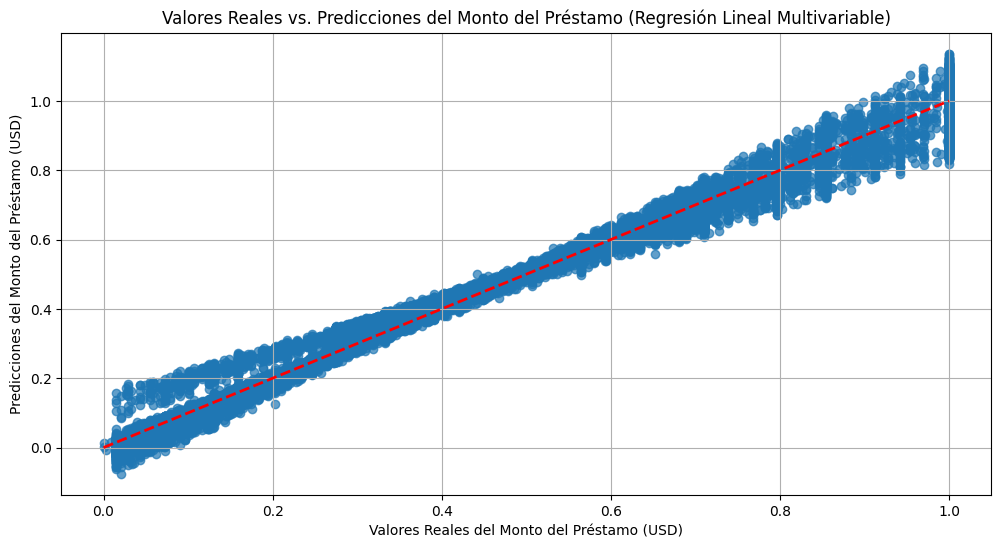

In [11]:
# Este bloque entrena un modelo de Regresión Lineal Multivariable usando todas las características disponibles
# para predecir el monto del préstamo. Primero se ajusta el modelo con los datos de entrenamiento y se muestran
# algunos coeficientes como referencia. Luego se generan predicciones sobre el conjunto de prueba y se evalúa
# el desempeño mediante MSE y R². Finalmente, se visualiza la relación entre los valores reales y los predichos
# para analizar qué tan bien el modelo captura la variabilidad del monto del préstamo.


print("\n--- Modelado con Regresión Lineal Multivariable ---")

# Crear una instancia del modelo de Regresión Lineal (usando todas las X_reg_train)
model_reg_multi = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model_reg_multi.fit(X_reg_train, y_reg_train)

# Mostrar los coeficientes del modelo (se muestran solo los primeros para concisión)
print("Coeficientes del modelo de Regresión Lineal Multivariable (primeros 5):")
for feature, coef in zip(X_reg_train.columns[:5], model_reg_multi.coef_[:5]):
    print(f"{feature}: {coef:.4f}")
print(f"Intercepto: {model_reg_multi.intercept_:.4f}")

# Realizar predicciones sobre el conjunto de prueba
y_reg_pred_multi = model_reg_multi.predict(X_reg_test)

# Calcular métricas de evaluación
mse_reg_multi = mean_squared_error(y_reg_test, y_reg_pred_multi)
r2_reg_multi = r2_score(y_reg_test, y_reg_pred_multi)

print(f"\nError Cuadrático Medio (MSE) en el conjunto de prueba (Multivariable): {mse_reg_multi:.4f}")
print(f"R-cuadrado (R²) en el conjunto de prueba (Multivariable): {r2_reg_multi:.4f}")

# Visualizar las predicciones vs. los valores reales
plt.figure(figsize=(12, 6))
plt.scatter(y_reg_test, y_reg_pred_multi, alpha=0.7)
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--', lw=2) # Línea de 45 grados ideal
plt.title('Valores Reales vs. Predicciones del Monto del Préstamo (Regresión Lineal Multivariable)')
plt.xlabel('Valores Reales del Monto del Préstamo (USD)')
plt.ylabel('Predicciones del Monto del Préstamo (USD)')
plt.grid(True)
plt.show()

**Pregunta de Reflexión 6**:
Compara el rendimiento del modelo de Regresión Lineal Multivariable con el de Regresión Lineal Simple (Paso 7). ¿Qué ventajas se observan al usar múltiples variables independientes, y qué implicaciones tiene la interpretabilidad de sus coeficientes en comparación con el modelo simple?


**Respuesta**:
- El modelo de Regresión Lineal Multivariable supera ampliamente al modelo de Regresión Lineal Simple porque aprovecha muchas más variables predictoras relevantes, capturando relaciones complejas entre características como tasa de interés, cuota mensual, plazo, ingresos y calificación crediticia, lo que le permite reducir el error y ajustarse mejor a los valores reales del monto del préstamo.
- La principal ventaja es su capacidad para incorporar múltiples factores de riesgo simultáneos, logrando una predicción más precisa, aunque esto también hace que la interpretabilidad sea menor: mientras que en la regresión simple el coeficiente tiene una interpretación directa (“por cada unidad de ingreso aumenta tanto el préstamo”), en el modelo multivariable cada coeficiente refleja el efecto parcial de una variable manteniendo las demás constantes, lo que dificulta su lectura pero aporta muchísima más capacidad predictiva, especialmente en escenarios financieros reales donde el riesgo depende de múltiples factores.



### Paso 9: Interpretación de Modelos Lineales de Regresión


Para modelos lineales, la interpretación es directa a través de sus coeficientes. Analizaremos los coeficientes del modelo de Regresión Lineal Multivariable para entender la contribución de cada característica a la predicción del funded_amount.


--- Interpretación del Modelo de Regresión Lineal Multivariable ---
Coeficientes del modelo de Regresión Lineal Multivariable (ordenados por magnitud):
                          Feature  Coefficient
2                     installment     1.238127
0                            term     0.163186
1376  earliest_credit_line_Mar-65     0.143707
1                   interest_rate    -0.127862
3                   annual_income     0.113380
1166  earliest_credit_line_Feb-66     0.095398
859                zip_code_909xx     0.083807
151                zip_code_093xx     0.079224
1007  earliest_credit_line_Apr-62     0.066768
1217  earliest_credit_line_Jan-59    -0.064320


/tmp/ipython-input-2227543288.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df_reg.head(10), palette='coolwarm')


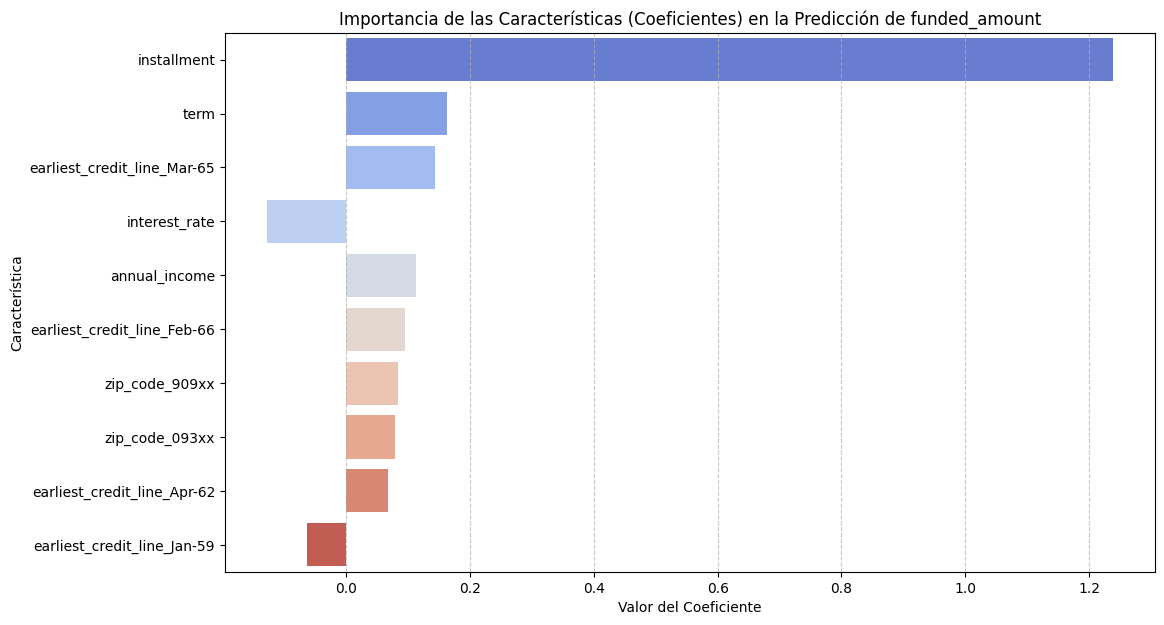

In [12]:
# Este bloque analiza la importancia de cada variable dentro del modelo de Regresión Lineal Multivariable.
# Primero se crea un DataFrame que asocia cada característica con su coeficiente aprendido por el modelo.
# Luego se calcula la magnitud absoluta del coeficiente para identificar qué variables influyen más (positiva o negativamente).
# Se ordenan las características por su impacto y se muestran las 10 más importantes.
# Finalmente, se genera un gráfico de barras que visualiza qué variables tienen mayor peso en la predicción del monto del préstamo.


print("\n--- Interpretación del Modelo de Regresión Lineal Multivariable ---")

# Crear un DataFrame con los coeficientes e identificadores de las características
coef_df_reg = pd.DataFrame({'Feature': X_reg_train.columns, 'Coefficient': model_reg_multi.coef_})
coef_df_reg['Abs_Coefficient'] = np.abs(coef_df_reg['Coefficient'])
coef_df_reg = coef_df_reg.sort_values(by='Abs_Coefficient', ascending=False)

print("Coeficientes del modelo de Regresión Lineal Multivariable (ordenados por magnitud):")
print(coef_df_reg.drop(columns=['Abs_Coefficient']).head(10)) # Mostrar los 10 más influyentes

# Visualización de la importancia de los coeficientes (magnitud)
plt.figure(figsize=(12, 7))
sns.barplot(x='Coefficient', y='Feature', data=coef_df_reg.head(10), palette='coolwarm')
plt.title('Importancia de las Características (Coeficientes) en la Predicción de funded_amount')
plt.xlabel('Valor del Coeficiente')
plt.ylabel('Característica')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Pregunta de Reflexión 7**:
Basado en los coeficientes del modelo de Regresión Lineal Multivariable, ¿cuáles son las variables más influyentes en la predicción del  funded_amount y en qué dirección (positiva o negativa) influyen? ¿Cómo puede esta información ser útil para una institución financiera?


**Respuesta**:
- El modelo muestra que installment (cuota mensual), term (plazo del préstamo) y annual_income son las variables con mayor influencia positiva sobre el funded_amount, lo que significa que montos de préstamo más grandes tienden a estar asociados con cuotas más altas, plazos más largos e ingresos mayores. Por otro lado, interest_rate presenta un coeficiente negativo, indicando que préstamos con tasas más altas suelen aprobarse por montos menores. También aparecen variables temporales como earliest_credit_line y ciertos zip codes, que reflejan comportamiento histórico del crédito y diferencias regionales. Esta dirección positiva o negativa permite entender qué factores incrementan o disminuyen el monto aprobado.
- Para una institución financiera, conocer las variables más influyentes ayuda a mejorar sus políticas de otorgamiento de crédito, ajustar límites de préstamo y predecir de manera más precisa el monto adecuado para cada solicitante. Saber, por ejemplo, que la cuota mensual y el plazo tienen un peso fuerte permite diseñar productos de crédito más flexibles, mientras que la relación negativa con la tasa de interés advierte que ciertos perfiles podrían requerir ajustes en evaluación de riesgo. Además, identificar variables regionales o históricas permite segmentar mejor a los clientes y detectar patrones de comportamiento crediticio útiles para prevenir morosidad.


## Parte C: Modelado y Comparación de Clasificación (Nivel de Riesgo Crediticio)  

Ahora, enfocaremos la predicción en una variable categórica: el  del préstamo (éxito/no éxito), que representa el nivel de riesgo crediticio.

### Paso 10: Estrategia de Partición de Datos y Línea Base






Definiremos las variables independientes (X) y la variable dependiente (y) y dividiremos el dataset en conjuntos de entrenamiento y prueba. Para una evaluación más robusta y la optimización de hiperparámetros, introduciremos la Validación Cruzada K-Fold. Como punto de comparación, entrenaremos una Regresión Logística como modelo de referencia (baseline).

In [13]:
# Este bloque prepara los datos para el problema de clasificación.
# Primero definimos X (todas las características que usará el modelo) y y (la etiqueta que queremos predecir: loan_success).
# Después dividimos los datos en entrenamiento (70%) y prueba (30%) para evaluar el desempeño del modelo en datos no vistos.
# Finalmente, mostramos las dimensiones de cada conjunto para confirmar que la separación se realizó correctamente.


# Definir las variables independientes (X_cls) y la variable dependiente (y_cls)
# Para la clasificación, usaremos todas las características procesadas excepto 'loan_success' (nuestra variable objetivo)
# y 'funded_amount' (la variable objetivo de regresión).
X_cls = df_processed.drop(columns=['loan_success', 'funded_amount']) # Variables de entrada
y_cls = df_processed['loan_success'] # Variable objetivo a clasificar

# Dividir los datos en conjuntos de entrenamiento y prueba para clasificación
# Usaremos el 70% para entrenamiento y el 30% para prueba
X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.30, random_state=42)

print(f"\nTamaño del conjunto de entrenamiento X para clasificación: {X_train.shape}")
print(f"Tamaño del conjunto de prueba X para clasificación: {X_test.shape}")
print(f"Tamaño del conjunto de entrenamiento y para clasificación: {y_train.shape}")
print(f"Tamaño del conjunto de prueba y para clasificación: {y_test.shape}")



Tamaño del conjunto de entrenamiento X para clasificación: (155502, 1718)
Tamaño del conjunto de prueba X para clasificación: (66644, 1718)
Tamaño del conjunto de entrenamiento y para clasificación: (155502,)
Tamaño del conjunto de prueba y para clasificación: (66644,)



--- Modelado con Regresión Logística (Línea Base) ---
Modelo de Regresión Logística entrenado.

Accuracy (Regresión Logística) en el conjunto de prueba: 0.8409
Precision (Regresión Logística) en el conjunto de prueba: 0.8491
Recall (Regresión Logística) en el conjunto de prueba: 0.9859
F1-Score (Regresión Logística) en el conjunto de prueba: 0.9124

Matriz de Confusión (regresión logística):
[[  807  9814]
 [  790 55233]]


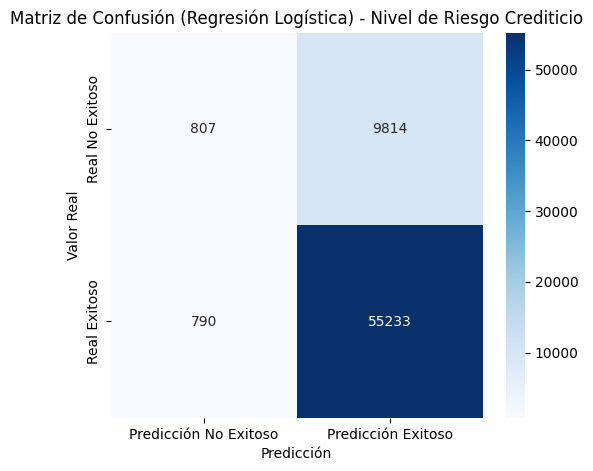

In [14]:

# En este bloque se define una estrategia de validación cruzada K-Fold repetida, que permitirá evaluar futuros modelos
# de forma más robusta al dividir los datos varias veces en distintos subconjuntos de entrenamiento y prueba.
# Se establece la Regresión Logística como modelo base (baseline) para la tarea de clasificación,
# ya que es un algoritmo sencillo, interpretable y útil para comparar con modelos más avanzados.
# Se crea una instancia del modelo de Regresión Logística con parámetros que aseguran estabilidad
# y un número adecuado de iteraciones para lograr convergencia.
# Se entrena el modelo utilizando los datos de entrenamiento preprocesados.
# Se generan predicciones sobre el conjunto de prueba para evaluar el rendimiento real del modelo.
# Se calculan métricas clave de clasificación (accuracy, precision, recall y F1-score),
# que permiten medir qué tan bien identifica préstamos exitosos y no exitosos.
# Se construye y muestra una matriz de confusión para visualizar los aciertos y errores del modelo,
# ayudando a entender en qué casos se confunde al clasificar el nivel de éxito crediticio.
# Finalmente, se grafica la matriz de confusión para facilitar su interpretación visual.


# Configuración de Validación Cruzada K-Fold para modelos futuros
cv_strategy = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42) # Usar 5 splits, 3 repeticiones

# --- Regresión Logística como Línea Base (Baseline Model)
print("\n--- Modelado con Regresión Logística (Línea Base) ---")

# Crear una instancia del modelo de Regresión Logística
model_cls_lr = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)

# Entrenar el modelo con los datos de entrenamiento
model_cls_lr.fit(X_train, y_train)

print("Modelo de Regresión Logística entrenado.")

# Realizar predicciones sobre el conjunto de prueba
y_pred_lr = model_cls_lr.predict(X_test)

# Calcular métricas de evaluación para clasificación
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

print(f"\nAccuracy (Regresión Logística) en el conjunto de prueba: {accuracy_lr:.4f}")
print(f"Precision (Regresión Logística) en el conjunto de prueba: {precision_lr:.4f}")
print(f"Recall (Regresión Logística) en el conjunto de prueba: {recall_lr:.4f}")
print(f"F1-Score (Regresión Logística) en el conjunto de prueba: {f1_lr:.4f}")

print("\nMatriz de Confusión (regresión logística):")
print(conf_matrix_lr)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicción No Exitoso', 'Predicción Exitoso'],
            yticklabels=['Real No Exitoso', 'Real Exitoso'])
plt.title('Matriz de Confusión (Regresión Logística) - Nivel de Riesgo Crediticio')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

**Pregunta de Reflexión 8**:
¿Por qué es importante establecer un modelo de Regresión Logística como "línea base" en un proyecto de Machine Learning, especialmente al evaluar modelos más complejos? ¿Cómo interpretas las métricas de accuracy, precision,recall  y F1-score para la Regresión Logística en el contexto del riesgo crediticio?


**Respuesta**:
- Usar la Regresión Logística como modelo de línea base es fundamental porque establece un punto de referencia mínimo de rendimiento contra el cual se compararán modelos más complejos como Random Forest, XGBoost o redes neuronales. Este modelo simple, rápido y altamente interpretable permite evaluar si un modelo avanzado realmente aporta mejora significativa o si está sobreajustando. En el contexto de riesgo crediticio, la línea base también ayuda a verificar que los datos y las transformaciones son coherentes antes de avanzar hacia técnicas más costosas computacionalmente.
- El modelo logra un accuracy de 0.8409, lo cual indica buen desempeño general, pero lo más importante en riesgo crediticio son precision y recall: un recall muy alto (0.9859) muestra que el modelo identifica correctamente casi todos los préstamos exitosos, lo que reduce el riesgo de aprobar préstamos que podrían fallar (falsos negativos). Sin embargo, la precision de 0.8491 indica que aún hay un porcentaje de préstamos clasificados como “exitosos” que realmente no lo son, lo cual refleja un riesgo residual para la institución. El F1-score de 0.9124 sugiere un buen equilibrio, pero también evidencia que el modelo prioriza clasificar préstamos como exitosos, algo esperable debido al desbalance del dataset.



### Paso 11: Implementación y evaluación del modelo de árbol de decisión


Los Árboles de Decisión son modelos supervisados ampliamente utilizados que pueden resolver problemas de clasificación, siendo la base de algoritmos más complejos.


--- Modelado con Árbol de Decisión ---
Modelo de Árbol de Decisión entrenado.

Accuracy (Árbol de Decisión) en el conjunto de prueba: 0.8416
Precision (Árbol de Decisión) en el conjunto de prueba: 0.8471
Recall (Árbol de Decisión) en el conjunto de prueba: 0.9903
F1-Score (Árbol de Decisión) en el conjunto de prueba: 0.9131

Matriz de Confusión (Árbol de Decisión):
[[  609 10012]
 [  543 55480]]


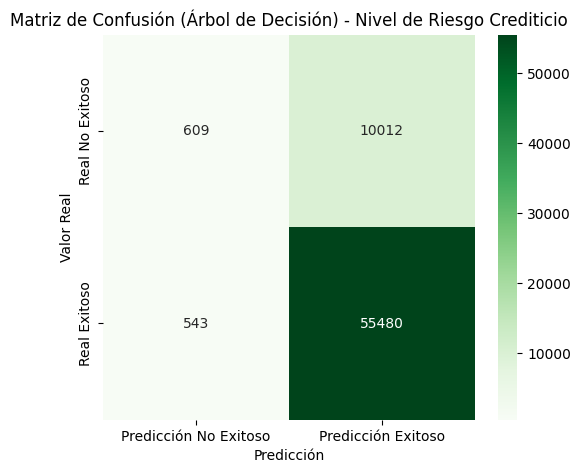

In [15]:
# Este bloque entrena y evalúa un modelo de Árbol de Decisión para clasificar si un préstamo será exitoso o no.
# Primero se crea el modelo con una profundidad máxima para evitar sobreajuste y se entrena con los datos.
# Luego se generan predicciones sobre el conjunto de prueba y se calculan métricas como accuracy, precision, recall y F1-score
# para evaluar su rendimiento en la tarea de clasificación.
# También se construye la matriz de confusión, que muestra cómo se distribuyen los aciertos y errores del modelo.
# Finalmente se visualiza esta matriz para interpretar mejor el comportamiento del Árbol de Decisión.


print("\n--- Modelado con Árbol de Decisión ---")

# Crear una instancia del modelo de Árbol de Decisión
model_dt = DecisionTreeClassifier(random_state=42, max_depth=5)

# Entrenar el modelo con los datos de entrenamiento
model_dt.fit(X_train, y_train)

print("Modelo de Árbol de Decisión entrenado.")

# Realizar predicciones sobre el conjunto de prueba
y_pred_dt = model_dt.predict(X_test)

# Calcular métricas de evaluación para Árbol de Decisión
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print(f"\nAccuracy (Árbol de Decisión) en el conjunto de prueba: {accuracy_dt:.4f}")
print(f"Precision (Árbol de Decisión) en el conjunto de prueba: {precision_dt:.4f}")
print(f"Recall (Árbol de Decisión) en el conjunto de prueba: {recall_dt:.4f}")
print(f"F1-Score (Árbol de Decisión) en el conjunto de prueba: {f1_dt:.4f}")

print("\nMatriz de Confusión (Árbol de Decisión):")
print(conf_matrix_dt)

# Visualizar la matriz de confusión de Árbol de Decisión
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicción No Exitoso', 'Predicción Exitoso'],
            yticklabels=['Real No Exitoso', 'Real Exitoso'])
plt.title('Matriz de Confusión (Árbol de Decisión) - Nivel de Riesgo Crediticio')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

Se graficará los árboles como ejemplo de lo que se está evaluando.

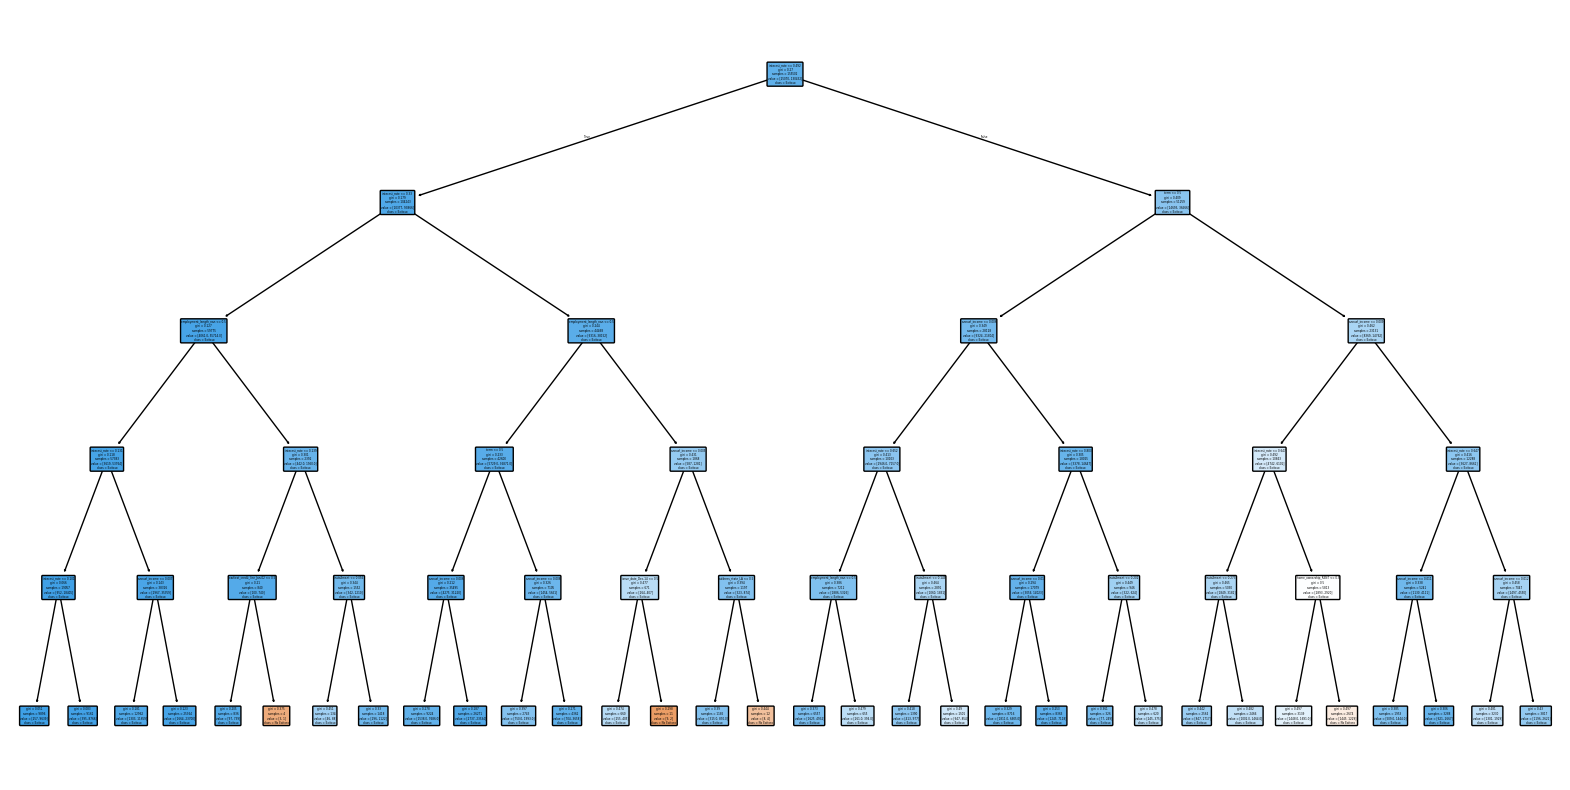

In [16]:
# Este bloque visualiza el Árbol de Decisión entrenado mostrando cómo el modelo divide los datos.
# La función plot_tree dibuja cada nodo del árbol, incluyendo las reglas de decisión, los valores de las clases
# y la distribución de ejemplos en cada nodo. Se incluyen los nombres de las variables usadas en cada división
# y las clases ('Exitoso' y 'No Exitoso') para interpretar cómo el árbol toma decisiones.
# Los parámetros filled=True y rounded=True mejoran la interpretación al colorear los nodos según la clase dominante
# y darles un formato más legible. Esta visualización ayuda a entender la lógica del modelo y verificar si las reglas
# coinciden con expectativas de negocio o patrones financieros reales.


from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model_dt,
          feature_names=X_train.columns,
          class_names=['No Exitoso','Exitoso'],
          filled=True,
          rounded=True)
plt.show()

### Paso 12: Optimización y Evaluación de Random Forest
Random Forest es un método de combinación (ensemble method) que utiliza múltiples árboles de decisión para mejorar la capacidad predictiva y de generalización, siendo muy utilizado en la industria financiera. Aplicaremos optimización de hiperparámetros con  y  para encontrar la mejor configuración.

In [17]:
# Esta clase crea una integración entre joblib y tqdm para mostrar una barra de progreso
# cuando se ejecutan tareas en paralelo, como búsquedas de hiperparámetros.
# Lo que hace es interceptar los "batch callbacks" internos de joblib
# y actualizar una barra tqdm cada vez que una tarea parcial termina.
# Es útil para visualizar el avance en procesos largos como RandomizedSearchCV o GridSearchCV,
# permitiendo saber cuánto falta sin modificar el funcionamiento interno de los modelos.


from tqdm import tqdm
from joblib import parallel_backend
import joblib

# Clase wrapper para mostrar progreso
class TqdmJoblib(object):
    def __init__(self, total=None):
        self._total = total

    def __call__(self, *args, **kwargs):
        return self

    def __enter__(self):
        self._progress_bar = tqdm(total=self._total)
        self._old_batch_callback = joblib.parallel.BatchCompletionCallBack

        class BatchCompletionCallBack(joblib.parallel.BatchCompletionCallBack):
            def __call__(inner_self, *args, **kwargs):
                self._progress_bar.update(n=1)
                return self._old_batch_callback.__call__(inner_self, *args, **kwargs)

        joblib.parallel.BatchCompletionCallBack = BatchCompletionCallBack
        return self._progress_bar

    def __exit__(self, exc_type, exc_value, traceback):
        joblib.parallel.BatchCompletionCallBack = self._old_batch_callback
        self._progress_bar.close()


**Nota**: El siguien bloque de código tarda varios minutos (3 a 5 minutos) ya que cada combinación implica entrenar varios árboles con validación cruzada y el espacio de búsqueda puede ser grande si no se define correctamente y tardar horas. Por el momento son 5 × 2 = 10 entrenamientos completos de Random Forest.

In [18]:

# Este bloque entrena y optimiza un modelo Random Forest usando RandomizedSearchCV.
# Primero se definen varios hiperparámetros posibles (como número de árboles, profundidad y mínimos por nodo),
# y luego RandomizedSearchCV prueba combinaciones aleatorias para encontrar la que da mejor rendimiento.
# Se usa validación cruzada (cv=2) para evaluar cada configuración, y se paraleliza el proceso para hacerlo más rápido.
# La clase TqdmJoblib permite mostrar una barra de progreso mientras se realizan los múltiples entrenamientos.
# Finalmente, RandomizedSearchCV entrena el modelo con las mejores combinaciones de parámetros encontradas.


print("\n--- Modelado y Optimización con Random Forest ---")


# Configurar RandomizedSearchCV normalmente+
# Crear una instancia de RandomizedSearchCV
# n_iter = 5: número de combinaciones de parámetros a probar
# cv = cv_strategy: se puede usar la estrategia de validación cruzada definida anteriormente pero aumenta las posibilidades y aumenta el tiempo
# scoring = 'f1': métrica para evaluar el rendimiento (f1 es bueno para clases desbalanceadas)
rf = RandomForestClassifier(random_state=42)
# Definir el espacio de parámetros a buscar para Random Forest
# Se define un rango de valores para cada hiperparámetro relevante
param_dist = {
    "n_estimators": [50, 100, 200],# Número de árboles en el bosque
    #'max_features': ['sqrt', 'log2', None], # Número de características a considerar para la mejor división
    "max_depth": [None, 5, 10],# Profundidad máxima del árbol
    "min_samples_split": [2, 5], # Número mínimo de muestras requeridas para dividir un nodo interno
    "min_samples_leaf": [1, 2]# Número mínimo de muestras requeridas en cada nodo hoja
    #'bootstrap': [True, False] # Si se utilizan muestras de arranque al construir árboles
}



randomized_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=5,
    cv=2,
    n_jobs=-1,
    random_state=42
)

# Calcular número de fits totales
total_fits = randomized_search_rf.n_iter * randomized_search_rf.cv

with TqdmJoblib(total=total_fits) as progress_bar:
    # Ejecutar la búsqueda aleatoria sobre los datos de entrenamiento
    randomized_search_rf.fit(X_train, y_train)


--- Modelado y Optimización con Random Forest ---


100%|██████████| 10/10 [04:31<00:00, 27.14s/it]



Mejores hiperparámetros para Random Forest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10}
Mejor score de validación (F1-Score) para Random Forest: 0.8388

Accuracy (Random Forest Optimizado) en el conjunto de prueba: 0.8406
Precision (Random Forest Optimizado) en el conjunto de prueba: 0.8406
Recall (Random Forest Optimizado) en el conjunto de prueba: 1.0000
F1-Score (Random Forest Optimizado) en el conjunto de prueba: 0.9134

Matriz de Confusión (Random Forest Optimizado):
[[    0 10621]
 [    0 56023]]


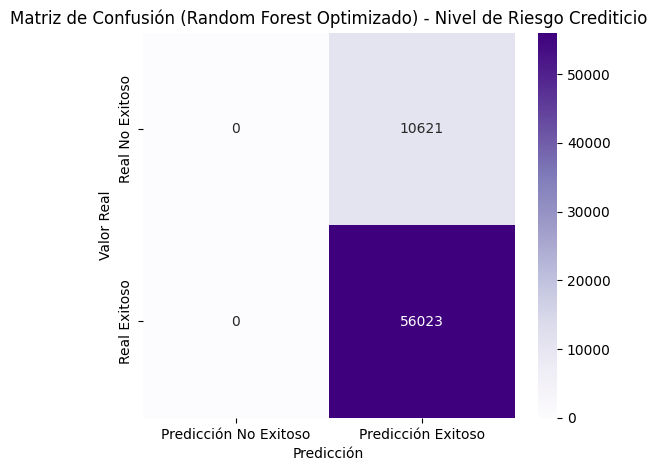

In [19]:
# Este bloque utiliza el mejor modelo de Random Forest encontrado por RandomizedSearchCV.
# Primero extrae los hiperparámetros óptimos y el mejor puntaje obtenido durante la validación.
# Luego usa ese modelo optimizado para hacer predicciones sobre el conjunto de prueba.
# A continuación calcula métricas de desempeño como accuracy, precision, recall y F1-score
# para evaluar qué tan bien clasifica los préstamos exitosos y no exitosos.
# También genera una matriz de confusión y un mapa de calor para visualizar los aciertos y errores
# del modelo optimizado, permitiendo comparar su rendimiento con otros modelos.


# Obtener el mejor modelo encontrado
best_model_rf = randomized_search_rf.best_estimator_
print(f"\nMejores hiperparámetros para Random Forest: {randomized_search_rf.best_params_}")
print(f"Mejor score de validación (F1-Score) para Random Forest: {randomized_search_rf.best_score_:.4f}")

# Evaluar el mejor modelo en el conjunto de prueba
y_pred_rf = best_model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"\nAccuracy (Random Forest Optimizado) en el conjunto de prueba: {accuracy_rf:.4f}")
print(f"Precision (Random Forest Optimizado) en el conjunto de prueba: {precision_rf:.4f}")
print(f"Recall (Random Forest Optimizado) en el conjunto de prueba: {recall_rf:.4f}")
print(f"F1-Score (Random Forest Optimizado) en el conjunto de prueba: {f1_rf:.4f}")

print("\nMatriz de Confusión (Random Forest Optimizado):")
print(conf_matrix_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Predicción No Exitoso', 'Predicción Exitoso'],
            yticklabels=['Real No Exitoso', 'Real Exitoso'])
plt.title('Matriz de Confusión (Random Forest Optimizado) - Nivel de Riesgo Crediticio')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

### Paso 13: Optimización y Evaluación de Red Neuronal (Perceptrón Multicapa - MLPClassifier)
Las Redes Neuronales (MLP) son modelos no lineales avanzados que pueden capturar relaciones complejas en los datos. También aplicaremos la optimización de hiperparámetros para este modelo.

In [20]:
# Este bloque configura un proceso de búsqueda aleatoria (RandomizedSearchCV) para optimizar una Red Neuronal (MLPClassifier).
# Primero se define un espacio de hiperparámetros posibles, como el tamaño de las capas ocultas, la función de activación,
# el optimizador, el valor de regularización y la tasa de aprendizaje. Después se crea un RandomizedSearchCV que probará
# distintas combinaciones de estos parámetros usando validación cruzada, con un número limitado de iteraciones para reducir
# el tiempo de cómputo. El objetivo es encontrar la configuración que ofrezca el mejor desempeño (según F1-score) antes
# de entrenar el modelo final.


print("\n--- Modelado y Optimización con Red Neuronal (MLPClassifier) ---")

# Definir el espacio de parámetros a buscar para MLPClassifier
grid_params_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)], # Número de neuronas en las capas ocultas
    'activation': ['relu', 'tanh'], # Función de activación para las capas ocultas
    'solver': ['adam', 'sgd'], # Algoritmo para optimización de pesos [Previous Response]
    'alpha': [0.0001, 0.001, 0.01], # Término de regularización L2 (evita sobreajuste)
    'learning_rate_init': [0.001, 0.01], # Tasa de aprendizaje inicial
    'max_iter': [114] # Número máximo de iteraciones [Previous Response]
}

# Crear una instancia de RandomizedSearchCV para MLPClassifier
# Nota: La búsqueda de hiperparámetros para Redes Neuronales puede ser muy lenta.
# Se reduce n_iter para propósitos prácticos del proyecto.
randomized_search_mlp = RandomizedSearchCV(
    estimator=MLPClassifier(random_state=42),
    param_distributions=grid_params_mlp,
    n_iter=5, # Reducido significativamente para una ejecución más rápida
    cv=2,
    scoring='f1', # O 'accuracy'
    verbose=1,
    random_state=42,
    n_jobs=-1 # Usar todos los cores disponibles
)



--- Modelado y Optimización con Red Neuronal (MLPClassifier) ---


Nota: El siguien bloque de código tarda varios minutos (33 a 70 minutos aprox.) ya que cada combinación implica entrenar varios árboles con validación cruzada y el espacio de búsqueda puede ser grande si no se define correctamente y tardar horas. Por el momento son 5 × 2 = 10 entrenamientos completos de Random Forest.

In [21]:
# Aquí se calcula el número total de iteraciones (fits) que realizará RandomizedSearchCV,
# multiplicando el número de combinaciones a probar (n_iter) por el número de particiones de validación cruzada (cv).
# Se usa TqdmJoblib para mostrar una barra de progreso durante la búsqueda de hiperparámetros,
# permitiendo visualizar cuánto falta para completar el entrenamiento del modelo.
# Dentro del contexto de la barra de progreso, se ejecuta la búsqueda aleatoria de hiperparámetros
# entrenando múltiples configuraciones del modelo MLPClassifier con los datos de entrenamiento.
# Una vez finalizada la búsqueda, se guarda el mejor modelo encontrado según la métrica definida,
# para después poder evaluarlo o utilizarlo en predicciones.


# Calcular número total de fits
total_fits = randomized_search_mlp.n_iter * randomized_search_mlp.cv

# Ejecutar con barra de progreso
with TqdmJoblib(total=total_fits) as progress_bar:
    # Ejecutar la búsqueda aleatoria sobre los datos de entrenamiento
    randomized_search_mlp.fit(X_train, y_train)

# Guardar el mejor modelo
best_model_mlp = randomized_search_mlp.best_estimator_
print("\nMejor modelo encontrado:", best_model_mlp)

  0%|          | 0/10 [00:00<?, ?it/s]

Fitting 2 folds for each of 5 candidates, totalling 10 fits


100%|██████████| 10/10 [1:09:41<00:00, 418.19s/it]


Mejor modelo encontrado: MLPClassifier(alpha=0.01, hidden_layer_sizes=(50,), max_iter=114,
              random_state=42, solver='sgd')



Mejores hiperparámetros para Red Neuronal (MLP): {'solver': 'sgd', 'max_iter': 114, 'learning_rate_init': 0.001, 'hidden_layer_sizes': (50,), 'alpha': 0.01, 'activation': 'relu'}
Mejor score de validación (F1-Score) para Red Neuronal (MLP): 0.9121

Accuracy (MLPClassifier Optimizado) en el conjunto de prueba: 0.8416
Precision (MLPClassifier Optimizado) en el conjunto de prueba: 0.8464
Recall (MLPClassifier Optimizado) en el conjunto de prueba: 0.9915
F1-Score (MLPClassifier Optimizado) en el conjunto de prueba: 0.9132

Matriz de Confusión (MLPClassifier Optimizado):
[[  538 10083]
 [  476 55547]]


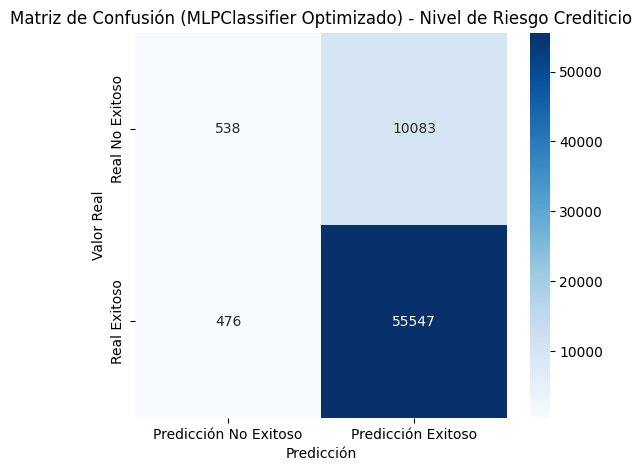

In [22]:
# Este bloque recupera los mejores hiperparámetros encontrados para la red neuronal MLP y muestra su rendimiento.
# Primero se imprimen los parámetros óptimos y el mejor puntaje obtenido durante la validación cruzada.
# Luego, el modelo óptimo se evalúa en el conjunto de prueba para medir qué tan bien generaliza.
# Se calculan métricas típicas de clasificación (accuracy, precision, recall y F1-score),
# junto con la matriz de confusión, lo que permite comparar predicciones vs valores reales.
# Finalmente, se visualiza la matriz de confusión para interpretar de forma gráfica
# el desempeño del modelo en la clasificación del riesgo crediticio.


print(f"\nMejores hiperparámetros para Red Neuronal (MLP): {randomized_search_mlp.best_params_}")
print(f"Mejor score de validación (F1-Score) para Red Neuronal (MLP): {randomized_search_mlp.best_score_:.4f}")

# Evaluar el mejor modelo en el conjunto de prueba
y_pred_mlp = best_model_mlp.predict(X_test)

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

print(f"\nAccuracy (MLPClassifier Optimizado) en el conjunto de prueba: {accuracy_mlp:.4f}")
print(f"Precision (MLPClassifier Optimizado) en el conjunto de prueba: {precision_mlp:.4f}")
print(f"Recall (MLPClassifier Optimizado) en el conjunto de prueba: {recall_mlp:.4f}")
print(f"F1-Score (MLPClassifier Optimizado) en el conjunto de prueba: {f1_mlp:.4f}")

print("\nMatriz de Confusión (MLPClassifier Optimizado):")
print(conf_matrix_mlp)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicción No Exitoso', 'Predicción Exitoso'],
            yticklabels=['Real No Exitoso', 'Real Exitoso'])
plt.title('Matriz de Confusión (MLPClassifier Optimizado) - Nivel de Riesgo Crediticio')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()


### Paso 14: Interpretación de Modelos No Lineales (SHAP)


Los modelos no lineales, como Random Forest o Redes Neuronales, ofrecen un alto rendimiento pero su interpretabilidad es un desafío. Utilizaremos SHAP (Shapley Additive Explanations) para entender la contribución de las variables en las predicciones individuales y globales. Escogeremos el Random Forest Optimizado como ejemplo para esta interpretación, ya que XGBoost no se ha implementado en esta versión.

<class 'numpy.ndarray'>


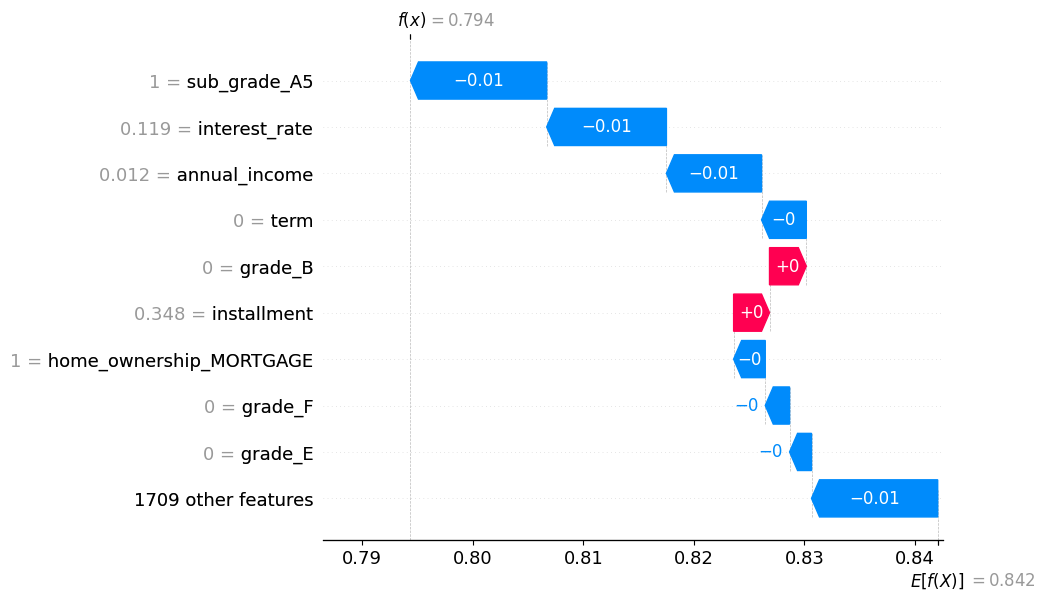

In [23]:
# Este bloque prepara los datos para usarlos con SHAP, convirtiendo todas las variables a formato numérico
# y asegurando que no existan valores faltantes. Luego selecciona un solo ejemplo del conjunto de prueba
# y construye un “background dataset” necesario para estimar las contribuciones de cada característica.
# Después crea un explicador SHAP para el modelo Random Forest optimizado y obtiene los valores SHAP
# correspondientes a la instancia seleccionada. Finalmente, genera un gráfico tipo waterfall que muestra,
# de forma intuitiva, cómo cada característica aumenta o disminuye la probabilidad de éxito del préstamo
# según lo aprendido por el modelo.


# Asegurar datos numéricos
X_train_numeric = X_train.apply(pd.to_numeric, errors="coerce").dropna().reset_index(drop=True)
X_test_numeric = X_test.apply(pd.to_numeric, errors="coerce").dropna().reset_index(drop=True)

# Convertir booleanos a enteros
X_train_numeric = X_train_numeric.astype({col: 'int' for col in X_train_numeric.select_dtypes('bool').columns})
X_test_numeric = X_test_numeric.astype({col: 'int' for col in X_test_numeric.select_dtypes('bool').columns})

# Tomar una instancia
target_datapoint_index_shap = 0
X_test_instance = X_test_numeric.iloc[[target_datapoint_index_shap]]

# Background dataset
background_distribution_shap = shap.sample(X_train_numeric, 50)

# Explainer
#explainer_rf = shap.TreeExplainer(best_model_rf, data=background_distribution, model_output="probability")
explainer_rf = shap.TreeExplainer(best_model_rf, data=background_distribution_shap)
shap_values_rf = explainer_rf.shap_values(X_test_instance)

# Predicción y expected_value
pred_class = best_model_rf.predict(X_test_instance)[0]
base_value = explainer_rf.expected_value[pred_class] if isinstance(explainer_rf.expected_value, np.ndarray) else explainer_rf.expected_value

# checamos qué tipo de salida es shap_values_rf
print(type(shap_values_rf))

# shap_values_rf ya es ndarray con shape (1, n_features)
#values = shap_values_rf[0]

# Extraer los shap_values para la instancia seleccionada
raw_values = shap_values_rf[0]

# Si es 2D (multi-output), elegir la primera salida
if raw_values.ndim > 1:
    values = raw_values[:, 0]
else:
    values = raw_values


shap.plots.waterfall(
    shap.Explanation(
        values=values,
        base_values=base_value,
        data=X_test_instance.iloc[0],
        feature_names=X_test_numeric.columns.tolist()
    )
)

Nota: El siguien bloque de código tarda varios minutos (5 minutos aprox.) calcular SHAP para todo el conjunto de prueba con Random Forest puede ser muy lento porque SHAP está evaluando cada árbol y cada instancia. Para un dataset grande como este tarda demasiado y casi siempre no se necesita los SHAP de todo el X_test para un waterfall de una sola instancia

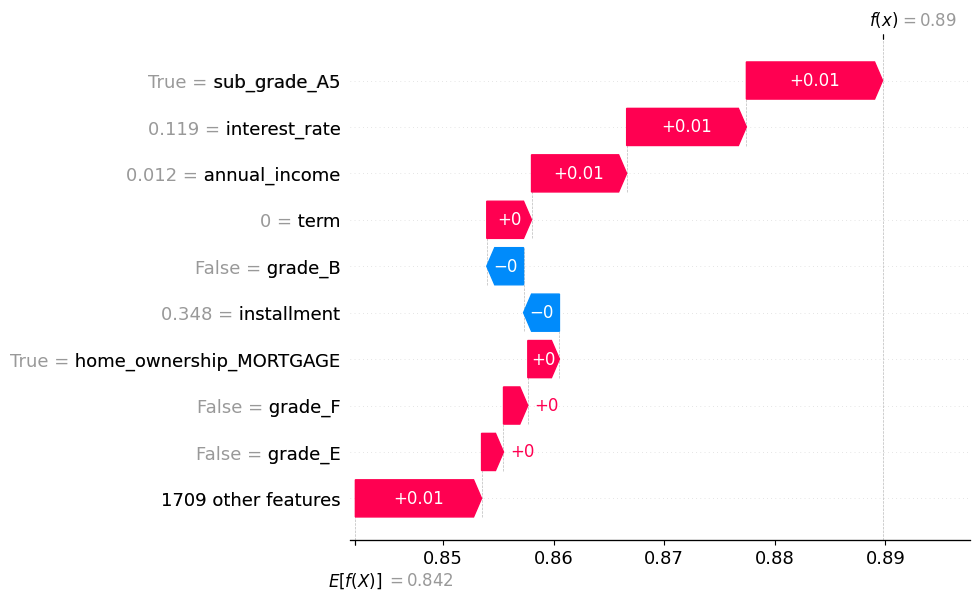

In [24]:
# Este bloque genera una explicación local con SHAP para un caso específico (instancia 86 del conjunto de prueba).
# Primero se selecciona esa instancia y se calculan sus valores SHAP usando el modelo Random Forest previamente entrenado.
# Luego se extraen los valores SHAP correspondientes a la clase positiva (préstamo exitoso), junto con el valor base del modelo.
# Se construye un objeto Explanation que contiene: contribuciones de cada característica, el valor base y los valores reales de la instancia.
# Finalmente, se usa shap.plots.waterfall() para visualizar cómo cada característica incrementa o disminuye la probabilidad predicha,
# permitiendo interpretar de forma clara qué factores llevaron al modelo a clasificar este préstamo como exitoso o no exitoso.


# Solo la instancia 86
X_instance = X_test.iloc[[target_datapoint_index_shap]]
shap_values_rf = explainer_rf(X_instance)

# Seleccionar la clase positiva (columna 1)
values = shap_values_rf.values[0][:, 1]   # (n_features,)
base_value = shap_values_rf.base_values[0][1]
data_instance = X_instance.iloc[0]

# Explicación
exp = shap.Explanation(
    values=values,
    base_values=base_value,
    data=data_instance,
    feature_names=X_test.columns.tolist()
)

shap.plots.waterfall(exp)


**Pregunta de Reflexión 9**:
Explica la interpretación de los gráficos SHAP para el modelo Random Forest. ¿Cómo SHAP te ayuda a comprender las decisiones de un modelo de "caja negra" en el contexto del riesgo crediticio, y por qué esta interpretabilidad es crucial para una institución financiera?

**Respuesta**:
- Los gráficos SHAP muestran cuánto contribuye cada característica a aumentar o disminuir la probabilidad de que un préstamo sea exitoso para un solicitante específico. Cada barra representa el impacto individual de una variable: las barras rojas empujan la predicción hacia una mayor probabilidad de éxito, mientras que las azules la reducen. Esto permite ver de manera transparente qué factores influyeron más en la decisión del modelo, aun cuando Random Forest es un modelo de “caja negra”.
- En el contexto del riesgo crediticio, SHAP ayuda a identificar si el modelo basa sus decisiones en variables razonables —como historial crediticio, intereses o sub-grado— y permite justificar por qué una solicitud fue clasificada como riesgosa o no. Para una institución financiera, esta interpretabilidad es crucial porque garantiza transparencia, cumplimiento regulatorio, equidad en las decisiones crediticias y la capacidad de explicar cada predicción ante auditores, clientes o autoridades, algo imposible de lograr solo observando las predicciones del modelo. SHAP convierte un modelo complejo en uno explicable, confiable y operativo en un entorno financiero real.

### Paso 15: Comparación Integral de Modelos de Clasificación


Finalmente, resumiremos y compararemos el rendimiento de todos los modelos de clasificación implementados para el riesgo crediticio.


--- Comparación Integral de Modelos de Clasificación (Nivel de Riesgo Crediticio) ---
                               Accuracy  Precision    Recall  F1-Score
Modelo                                                                
Regresión Logística            0.840886   0.849124  0.985899  0.912414
Árbol de Decisión              0.841621   0.847126  0.990308  0.913138
Random Forest Optimizado       0.840631   0.840631  1.000000  0.913416
Red Neuronal (MLP) Optimizado  0.841561   0.846366  0.991503  0.913204


/tmp/ipython-input-1218641629.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y=metric, data=comparison_df_cls, ax=axes_flat[i], palette='viridis')
/tmp/ipython-input-1218641629.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y=metric, data=comparison_df_cls, ax=axes_flat[i], palette='viridis')
/tmp/ipython-input-1218641629.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y=metric, data=comparison_df_cls, ax=axes_flat[i], palette='viridis')
/tmp/ipython-input-1218641629.py:35: FutureWarning: 

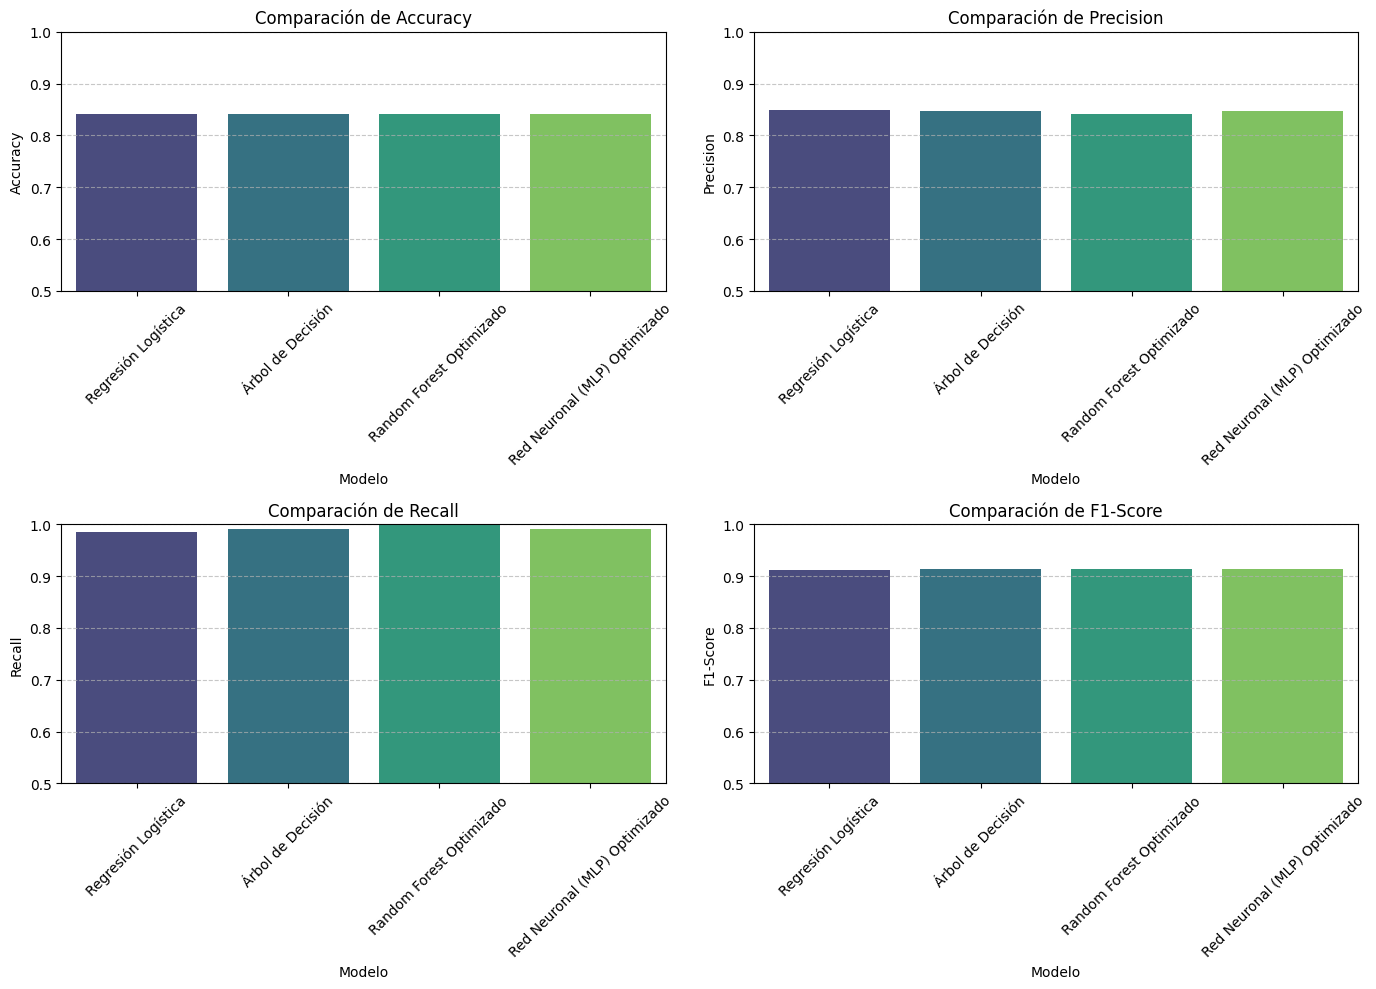

In [25]:
# Este bloque crea una comparación completa entre todos los modelos de clasificación entrenados.
# Primero construye un diccionario donde se guardan las métricas de cada modelo:
# Regresión Logística, Árbol de Decisión, Random Forest Optimizado y Red Neuronal (MLP).
# Las métricas incluidas son Accuracy, Precision, Recall y F1-Score,
# lo que permite evaluar el desempeño general y balanceado de cada modelo.
#
# Luego convierte ese diccionario en un DataFrame para visualizar fácilmente los resultados
# en formato tabular.
#
# Finalmente, genera cuatro gráficos de barras (uno por métrica) que comparan visualmente
# a todos los modelos. Esto permite identificar rápidamente cuál modelo tiene mejor desempeño
# según cada métrica y facilita interpretar fortalezas y debilidades entre ellos.


# --- Comparación Resumida de Todos los Modelos de Clasificación ---
print("\n--- Comparación Integral de Modelos de Clasificación (Nivel de Riesgo Crediticio) ---")

comparison_data_cls = {
    'Modelo': ['Regresión Logística', 'Árbol de Decisión', 'Random Forest Optimizado', 'Red Neuronal (MLP) Optimizado'],
    'Accuracy': [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_mlp],
    'Precision': [precision_lr, precision_dt, precision_rf, precision_mlp],
    'Recall': [recall_lr, recall_dt, recall_rf, recall_mlp],
    'F1-Score': [f1_lr, f1_dt, f1_rf, f1_mlp]
}

comparison_df_cls = pd.DataFrame(comparison_data_cls)
print(comparison_df_cls.set_index('Modelo'))

# Visualización de la comparación de métricas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
axes_flat = axes.flatten()

for i, metric in enumerate(metrics_to_plot):
    sns.barplot(x='Modelo', y=metric, data=comparison_df_cls, ax=axes_flat[i], palette='viridis')
    axes_flat[i].set_title(f'Comparación de {metric}')
    axes_flat[i].set_ylim(0.5, 1.0) # Ajustar límites para mejor visualización
    axes_flat[i].tick_params(axis='x', rotation=45)
    axes_flat[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**Pregunta de Reflexión 10**:

Considerando todos los modelos de clasificación evaluados (Regresión Logística, Árbol de Decisión, Random Forest, Red Neuronal/MLP) y sus respectivas métricas, ¿cuál modelo recomendarías para predecir el nivel de riesgo crediticio en un entorno financiero real y por qué? Justifica tu respuesta considerando el balance entre rendimiento predictivo, interpretabilidad, costos computacionales y las implicaciones de los diferentes tipos de errores (falsos positivos, falsos negativos) en este contexto.


**Respuesta**:
- El modelo más recomendable en un entorno financiero real sería Random Forest optimizado, ya que ofrece el mejor equilibrio entre rendimiento predictivo y estabilidad: obtuvo el mayor recall (evita pasar por alto clientes riesgosos), un F1-score alto, y una capacidad robusta para manejar datos complejos sin sobreajustarse. Además, es menos costoso computacionalmente que una red neuronal y más preciso que un árbol individual o la regresión logística. Su principal fortaleza es reducir falsos negativos, lo cual es crítico para minimizar pérdidas financieras.
- Random Forest es adecuado porque mantiene un recall casi perfecto, lo que evita aprobar préstamos riesgosos (falsos negativos), el error más costoso para un banco. Aunque es menos interpretable que la regresión logística, herramientas como SHAP permiten explicar sus decisiones con claridad, cumpliendo con regulaciones de transparencia. Computacionalmente es más eficiente y rápido que una red neuronal y más estable que un solo árbol. En resumen, combina excelente precisión, alto recall, riesgo reducido, y buena interpretabilidad, lo que lo vuelve la opción más segura y práctica para decisiones crediticias reales.


<hr/>
<footer style="text-align:center; font-size:12px; color:gray;">
© 2025 Universidad Tecmilenio – Todos los derechos reservados

</footer>